In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

In [2]:
df = pd.read_excel('.//data//partner_in_analysis_tableau.xlsx', sheet_name=1)

### Знакомство с датасетом

In [3]:
df.shape

(150297, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150297 entries, 0 to 150296
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ResearchDate  150297 non-null  datetime64[ns]
 1   RespondentID  150297 non-null  object        
 2   Start         150297 non-null  datetime64[ns]
 3   Stop          150297 non-null  datetime64[ns]
 4   Duration      150297 non-null  int64         
 5   PackageID     150297 non-null  int64         
 6   Weight        150297 non-null  float64       
 7   Title         150297 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(2), object(2)
memory usage: 9.2+ MB


In [5]:
df.rename(columns=lambda x:x.lower(), inplace=True)

In [6]:
df.head()

,researchdate,respondentid,start,stop,duration,packageid,weight,title
0,2021-02-06,resp0478878,2021-02-06 20:20:00,2021-02-06 20:20:00,60,2004,6.59,Мужчины 45-54
1,2021-02-06,resp0478878,2021-02-06 15:45:00,2021-02-06 17:08:00,5040,2039,6.59,Мужчины 45-54
2,2021-02-06,resp0478878,2021-02-06 10:07:00,2021-02-06 11:57:00,6660,2075,6.59,Мужчины 45-54
3,2021-02-06,resp0478878,2021-02-06 21:05:00,2021-02-06 21:06:00,120,2075,6.59,Мужчины 45-54
4,2021-02-06,resp0478878,2021-02-06 18:09:00,2021-02-06 18:38:00,1800,2086,6.59,Мужчины 45-54


In [7]:
df[['duration', 'weight']].describe().round(2)

,duration,weight
count,150297.00,150297.00
mean,959.73,7.68
std,1921.13,10.42
min,60.00,0.09
25%,120.00,2.15
50%,300.00,3.96
75%,960.00,7.12
max,50640.00,52.07


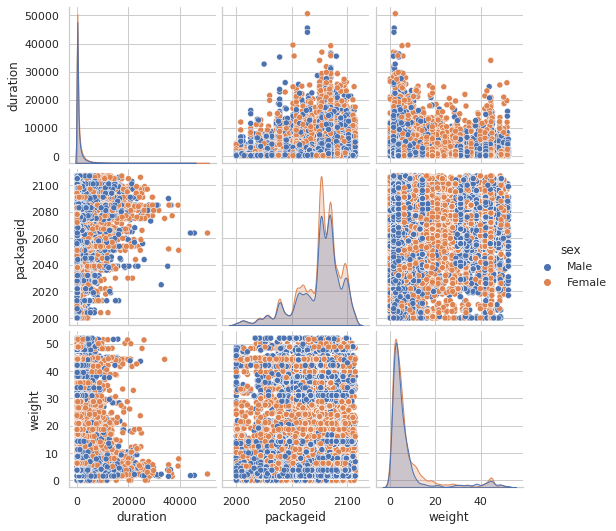

In [8]:
df['sex'] = np.where(df.title.str.startswith('Мужчины'), 'Male', 'Female')

%config InlineBackend.figure_format = 'png' 
sns.pairplot(df, hue='sex');

In [9]:
df.corr()

,duration,packageid,weight
duration,1.000000,0.069857,-0.004452
packageid,0.069857,1.000000,0.006917
weight,-0.004452,0.006917,1.000000


In [10]:
# в исходном df величины не коррелируют друг с другом
# большинство duration и weight небольшие, их распределение смещено влево
# их распределения очень быстро падают
# в packageid есть преобладающие значения id
# все величины распределены равномерно в зависимости от пола

### Предобработка датасета

In [11]:
df.isna().sum()

# нет пропущенных значений

researchdate    0
respondentid    0
start           0
stop            0
duration        0
packageid       0
weight          0
title           0
sex             0
dtype: int64

In [12]:
df.duplicated().any()

# в исходном датафрейме есть дубликаты

True

In [13]:
df.drop_duplicates(inplace=True)
df.shape

(148581, 9)

### Анализ датасета

In [14]:
df.groupby('respondentid').agg({'title': pd.Series.nunique}).title.unique()

# каждый респондент отнесён к одной группе

array([1])

In [15]:
mask = (df.researchdate == pd.to_datetime(df['start'].dt.date))
df[~mask]

# есть несовпадающие значения ResearchDate и датой начала сессии просмотра
# Значит дата сменяется не в полночь, а в другой момент времени

,researchdate,respondentid,start,stop,duration,packageid,weight,title,sex
44,2021-02-06,resp1219440,2021-02-07 00:47:00,2021-02-07 00:47:00,60,2029,11.673,Мужчины 35-44,Male
48,2021-02-06,resp1219440,2021-02-07 00:07:00,2021-02-07 00:08:00,120,2081,11.673,Мужчины 35-44,Male
49,2021-02-06,resp1219440,2021-02-07 00:21:00,2021-02-07 00:21:00,60,2081,11.673,Мужчины 35-44,Male
50,2021-02-06,resp1219440,2021-02-07 00:25:00,2021-02-07 00:26:00,120,2081,11.673,Мужчины 35-44,Male
51,2021-02-06,resp1219440,2021-02-07 00:33:00,2021-02-07 00:40:00,480,2081,11.673,Мужчины 35-44,Male
...,...,...,...,...,...,...,...,...,...
150148,2021-02-14,resp9275616,2021-02-15 01:10:00,2021-02-15 01:25:00,960,2058,1.694,Мужчины 35-44,Male
150161,2021-02-14,resp9275616,2021-02-15 00:40:00,2021-02-15 00:40:00,60,2090,1.694,Мужчины 35-44,Male
150162,2021-02-14,resp9275616,2021-02-15 00:45:00,2021-02-15 00:59:00,900,2090,1.694,Мужчины 35-44,Male
150164,2021-02-14,resp9508876,2021-02-15 00:25:00,2021-02-15 00:25:00,60,2082,3.390,Мужчины 25-34,Male


In [16]:
df[~mask].start.max(), df[mask].start.min()

# день отсчитывается с 5 часов утра

(Timestamp('2021-02-15 04:52:00'), Timestamp('2021-02-06 05:00:00'))

In [17]:
title_vs_weidur = df.groupby('title', as_index=False).agg({'weight': np.mean, 'duration': np.mean}) \
                    .rename(columns={"weight": "weight_mean", "duration": "duration_mean"}) \
                    .merge( \
            df.groupby('title', as_index=False) \
            .agg({'weight': np.sum, 'duration': np.sum, 'packageid': lambda x: len(set(x)), \
                                                'respondentid': lambda x: len(set(x))}) \
            .rename(columns={"weight": "weight_sum", "duration": "total_length", "packageid":"pack_amount", "respondentid": "respondents_number"}), on='title')


title_vs_weidur['sex'] = np.where(title_vs_weidur.title.str.startswith('Мужчины'), 'Male', 'Female')

title_vs_weidur

# данные по titlе'ам (и по дате) разбиты в примерно одинаковой пропорции по количеству packageid
# у женщин монотонно растёт средняя длительность сессии, у мужчин она примерно одинаковая

,title,weight_mean,duration_mean,weight_sum,total_length,pack_amount,respondents_number,sex
0,Женщины 18-24,12.376952,607.772891,30954.758,1520040,93,34,Female
1,Женщины 25-34,7.334315,799.731824,73841.887,8051700,101,122,Female
2,Женщины 35-44,4.534676,877.779007,90203.773,17460780,102,180,Female
3,Женщины 45-54,5.677915,1028.715838,88297.251,15997560,100,139,Female
4,Женщины 55-64,8.485104,1142.301082,159961.173,21534660,100,127,Female
5,Женщины 65+,14.368276,1205.205876,188784.783,15835200,101,81,Female
6,Мужчины 18-24,5.008361,733.242321,13207.047,1933560,95,42,Male
7,Мужчины 25-34,5.597038,861.379923,56703.591,8726640,101,131,Male
8,Мужчины 35-44,5.404048,961.586140,72365.602,12876600,100,154,Male
9,Мужчины 45-54,7.090863,876.016874,95811.747,11836740,100,113,Male


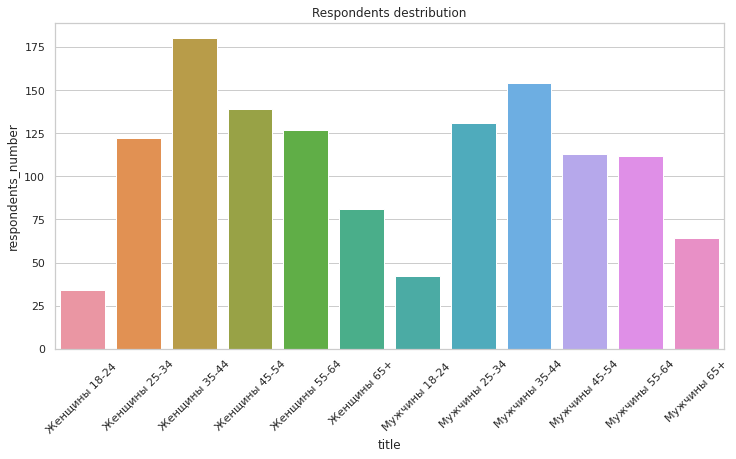

In [18]:
sns.barplot(x=title_vs_weidur.title, y=title_vs_weidur.respondents_number)

plt.title('Respondents destribution')
plt.xticks(rotation=45);

In [19]:
df.sex.value_counts(normalize=True)

# распределение респондентов по полу примерно одниаковое, основная аудитория - мужчины и женщины среднего возраста
# Количество женщин 45+ падает в сравнении с предыдущей группой (35-44), а средняя продолжительность сеанса растёт
# Значит старшее поколение в среднем смотрит телевизор значительно больше младшего

Female    0.538447
Male      0.461553
Name: sex, dtype: float64

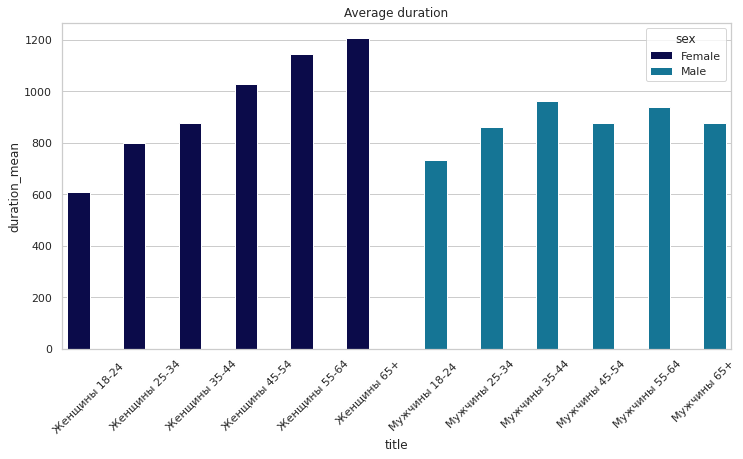

In [20]:
sns.barplot(x = title_vs_weidur.title,
            y = title_vs_weidur.duration_mean, palette='ocean', hue=title_vs_weidur.sex); # , ax=axes[0])
plt.title('Average duration')
plt.xticks(rotation=45);

In [21]:
np.array(title_vs_weidur.query("sex=='Male'").duration_mean.to_list()) / np.array(title_vs_weidur.query("sex=='Female'").duration_mean.to_list())

array([1.20644131, 1.07708597, 1.09547635, 0.85156351, 0.82200848,
       0.72759368])

In [22]:
# Молодые мужчины (до 44 лет) смотрят телевизор больше, чем женщины, после 45 лет ситуация меняется

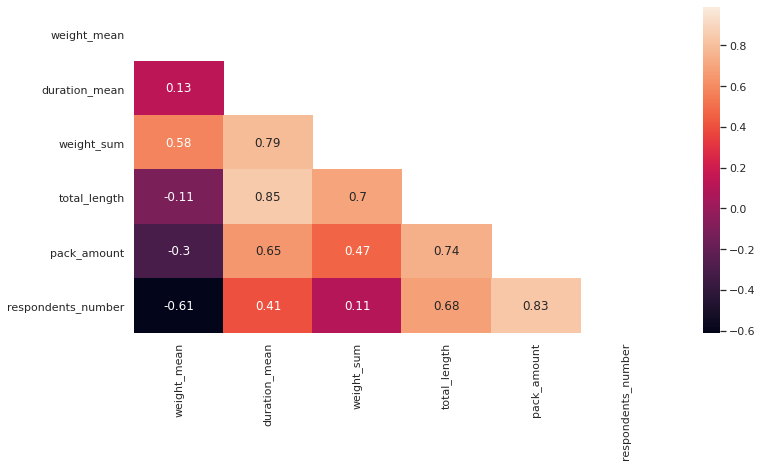

In [23]:
corr_matrix = title_vs_weidur.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, vmax=.99, annot=True);

In [24]:
# количество респондентов в группе положительно коррелирует с количеством уникальных packageid (0.83) и длинной сессий (total_length) - 0.68 
# количество респондентов в группе отрицательно коррелирует с weight_mean (-0.61)
'''чем больше респондентов, тем больше количество уникальных packageid и количество сессий,
а также меньше средний weight - у большинтсва пользователей weight невысокий'''

# packageid положительно коррелирует с duration_mean (0.65) и total_length (0.74)
'''чем больше packageid, тем выше среднее время и общее число сессий''';

# weight_sum положительно коррелирует с total_lenght и duration_mean
# общая сумма weight увеличивается при увеличении количества и длительности сессий
# с учётом небольшой (0.11) корреляции числа респондентов и weight_sum
# можно предположить, что длительность сессий и их количество частично влияют на увеличение weight_sum
# все выводы рассматриваются внутри title'ов

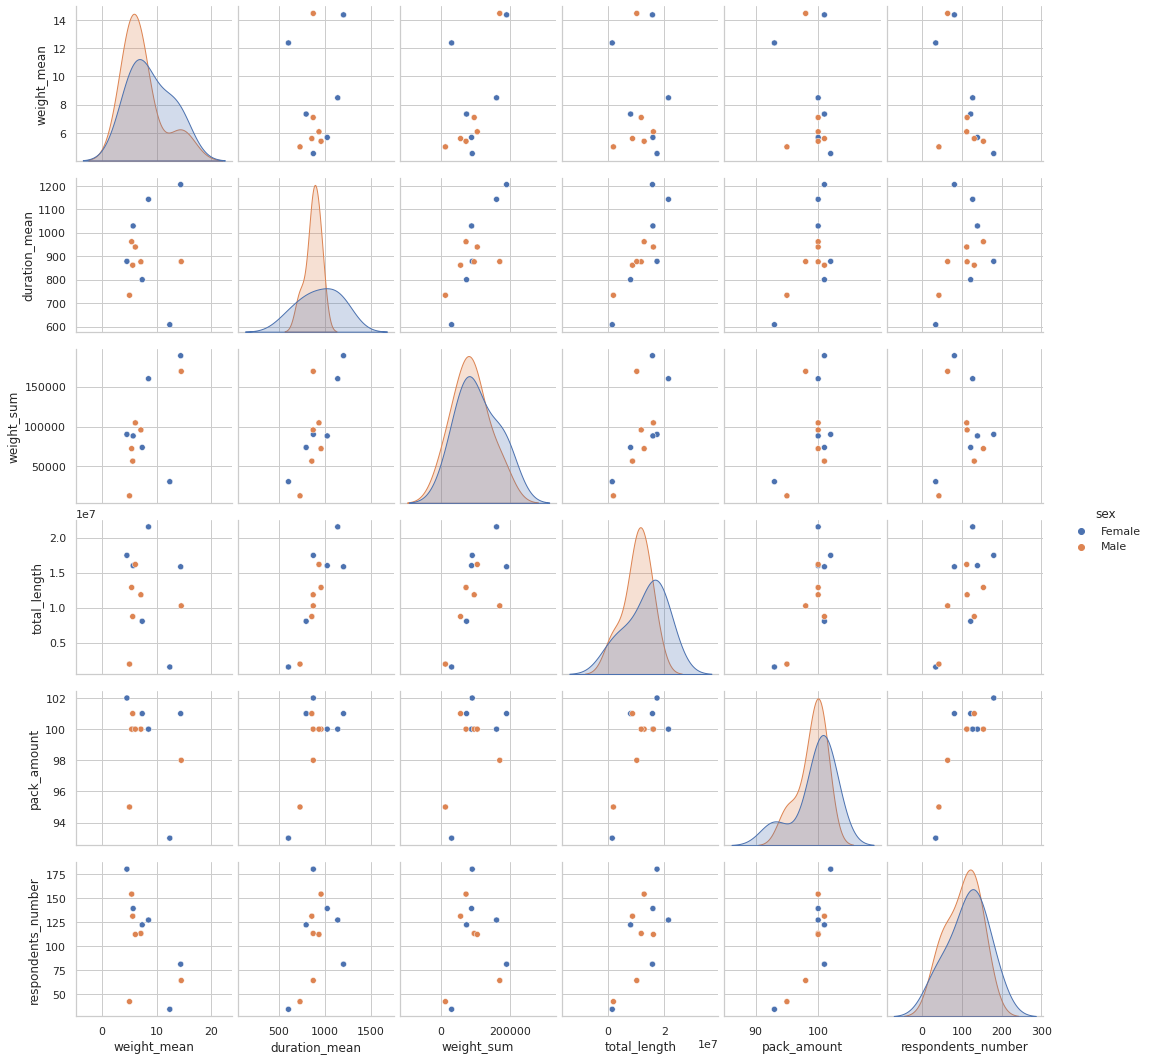

In [25]:
sns.pairplot(title_vs_weidur, hue='sex');

In [26]:
# Внутри title'ов разбиение packageid и respondents_number по полу близко к равномерному
# больше всего средних значений, меньше - маргинальных
# в целом крайние группы - 18-24 и 65+ выбиваются из общего поведения

In [27]:
df.groupby(['researchdate', 'respondentid'], as_index=False).agg({'weight': pd.Series.nunique}).weight.max()

# Каждой паре (дата, id респондента) соответствует одно значение weight
# Weight - это вес, занимаемый одним пользователем в данный день (выделяемый на пользователя/присуждаемый ему?)
# некая корреляция между weight_sum и одщей длинной сессий / их средним значением уже наблюдалась
# интересно проверить коррелируют ли уникальные значения weight с количеством пакетов (packageid)
# можно проверить корреляцию среднего weight по дням и средней суммы packageid у респондентов по дням

1.0

In [28]:
tmp = df.groupby(['researchdate','respondentid'], as_index=False).agg({'weight': np.mean, 'packageid': pd.Series.nunique})
tmp.groupby('researchdate').agg({'weight': np.mean, 'packageid': np.mean}).corr()

# уникальные weight слабо коррелируют со средней по дням суммой уникальных значений packageid пользователей

,weight,packageid
weight,1.000000,0.321364
packageid,0.321364,1.000000


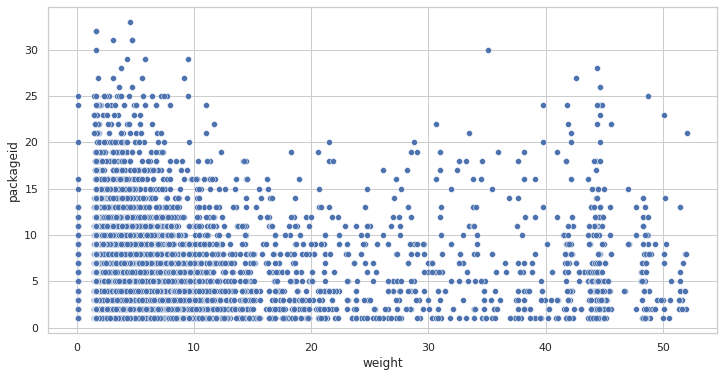

In [29]:
sns.scatterplot(x=tmp.weight, y=tmp.packageid);

# вероятно, что даже такой небольшой корреляционный эффект случаен

In [30]:
datetid = df.groupby(['researchdate', 'respondentid'], as_index=False) \
                .agg({'weight': np.mean, 'duration': lambda x:len(list(x)), 'packageid': pd.Series.nunique}) \
                .rename(columns={"weight": "weight_uniq", "duration": "session_amount", "packageid": "pack_uniq_amount"})


datetid.head()

# проверим корреляцию значений weight_uniq с количеством сессий и уникальных packagid 

,researchdate,respondentid,weight_uniq,session_amount,pack_uniq_amount
0,2021-02-06,resp0003126,3.583,13,4
1,2021-02-06,resp0014405,3.961,17,4
2,2021-02-06,resp0017570,3.001,18,14
3,2021-02-06,resp0018372,4.352,22,7
4,2021-02-06,resp0024920,1.792,14,6


In [31]:
datetid[['weight_uniq', 'session_amount', 'pack_uniq_amount']].corr().style.background_gradient(cmap='viridis')

# корреляция weight_uniq с другими переменными слабая, наблюдается сильная корреляция количества сессий и числа пакетов

,weight_uniq,session_amount,pack_uniq_amount
weight_uniq,1.000000,0.052017,0.042467
session_amount,0.052017,1.000000,0.738808
pack_uniq_amount,0.042467,0.738808,1.000000


In [32]:
# уникальный weight довольно слабо коррелирует с другими величинами
# weight_sum коррелирует со средней длительностью сессии, вероятно за счёт увеличения числа респондентов

In [33]:
tmp = df.groupby(['researchdate']).agg({'respondentid': 'count', 'packageid': pd.Series.nunique, 'weight': np.sum})
tmp.corr()

,respondentid,packageid,weight
respondentid,1.000000,-0.353552,0.953506
packageid,-0.353552,1.000000,-0.445548
weight,0.953506,-0.445548,1.000000


In [34]:
# величина weight слабо зависит от остальных

In [35]:
# Проверим данные в разрезе времени суток
# Утро - 5-11 часов; день - 11-17 часов; вечер - 17-23 часов; ночь - 23-5 часов

df['start_time'] = df.start.apply(lambda x: x.strftime('%H:%M:%S'))

conditions = [(df.start_time >= '05:00:00') & (df.start_time < '11:00:00'), 
              (df.start_time >= '11:00:00') & (df.start_time < '17:00:00'), 
              (df.start_time >= '17:00:00') & (df.start_time < '23:00:00'),
              (df.start_time >= '23:00:00') | (df.start_time < '05:00:00')]

values = ['morning', 'daytime', 'evening', 'night']

df['day_time'] = np.select(conditions, values)

In [36]:
print(df.day_time.unique())
df.drop(['start_time'], axis=1, inplace=True)
df.head()

['evening' 'daytime' 'morning' 'night']


,researchdate,respondentid,start,stop,duration,packageid,weight,title,sex,day_time
0,2021-02-06,resp0478878,2021-02-06 20:20:00,2021-02-06 20:20:00,60,2004,6.59,Мужчины 45-54,Male,evening
1,2021-02-06,resp0478878,2021-02-06 15:45:00,2021-02-06 17:08:00,5040,2039,6.59,Мужчины 45-54,Male,daytime
2,2021-02-06,resp0478878,2021-02-06 10:07:00,2021-02-06 11:57:00,6660,2075,6.59,Мужчины 45-54,Male,morning
3,2021-02-06,resp0478878,2021-02-06 21:05:00,2021-02-06 21:06:00,120,2075,6.59,Мужчины 45-54,Male,evening
4,2021-02-06,resp0478878,2021-02-06 18:09:00,2021-02-06 18:38:00,1800,2086,6.59,Мужчины 45-54,Male,evening


In [37]:
df.groupby('day_time') \
            .agg({"duration": [lambda x: len((list(x))), np.mean], "respondentid": pd.Series.nunique}) \
            .rename(columns={'<lambda_0>': 'session_amount'}).round(2)

duration          respondentid
         session_amount     mean      nunique
day_time                                     
daytime           42583   955.31         1149
evening           65960   951.94         1226
morning           21067  1017.61         1004
night             18971   911.04          954

In [38]:
# среднее время сессии в течение дня примерно одно (немного больше утром)
# вечером проходит значительно больше сессий
# по количеству уникальных респондентов распределение тоже достаточно сбалансированное, хотя
# при этом в вечернее время уникальных респондентов больше, а ночью - немного меньше, чем обычно

In [39]:
tmp = df.groupby('day_time', as_index=False) \
                    .agg({"duration": lambda x: len(list(x)), 'respondentid': pd.Series.nunique, 'packageid': pd.Series.nunique}) \
                    .rename({'duration': 'number_of_sessions', 'respondentid': 'respondents_uniq', 'packageid': 'packages_uniq'})

tmp = tmp.assign(sessions_per_user = tmp.duration / tmp.respondentid).round(2)
tmp

,day_time,duration,respondentid,packageid,sessions_per_user
0,daytime,42583,1149,102,37.06
1,evening,65960,1226,102,53.80
2,morning,21067,1004,101,20.98
3,night,18971,954,101,19.89


In [40]:
# по параметру packageid распределение равномерное
# больше всего сессий на одного респондента приходится на вечернее время, менньше всего - на ночное

In [41]:
tmp = df.groupby('day_time', as_index=False) \
                        .agg({"duration": 'count', 'respondentid': pd.Series.nunique, 'packageid': pd.Series.nunique}) \
                        .rename({'duration': 'number_of_sessions', 'respondentid': 'respondents_uniq', 'packageid': 'packages_uniq'})
tmp = tmp.assign(sessions_per_user = tmp.duration / tmp.respondentid).round(2)
tmp

,day_time,duration,respondentid,packageid,sessions_per_user
0,daytime,42583,1149,102,37.06
1,evening,65960,1226,102,53.80
2,morning,21067,1004,101,20.98
3,night,18971,954,101,19.89


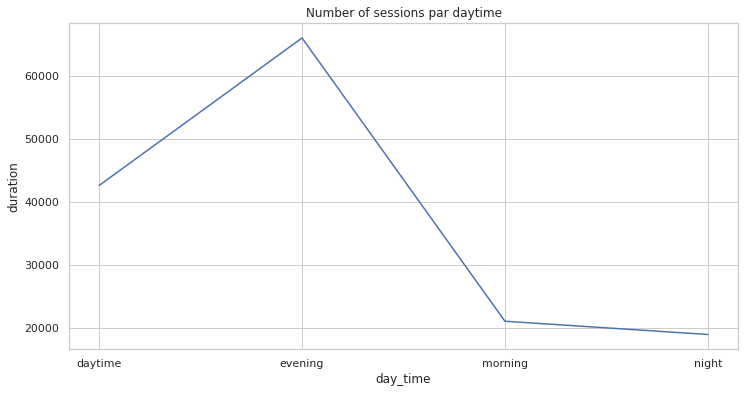

In [42]:
sns.lineplot(x=tmp.day_time, y=tmp.duration)
plt.title('Number of sessions par daytime');

In [43]:
# наибольшее количество сессий приходится на вечернее время суток

In [44]:
tmp = df.groupby('researchdate', as_index=False) \
                .agg({"duration": 'count', 'respondentid': pd.Series.nunique, 'packageid': pd.Series.nunique}) \
                .rename({'duration': 'number_of_sessions', 'respondentid': 'respondents_uniq', 'packageid': 'packages_uniq'})
tmp = tmp.assign(sessions_per_user = tmp.duration / tmp.respondentid).round(2)
tmp

,researchdate,duration,respondentid,packageid,sessions_per_user
0,2021-02-06,17786,936,102,19.00
1,2021-02-07,19146,971,100,19.72
2,2021-02-08,14315,930,101,15.39
3,2021-02-09,14684,937,101,15.67
4,2021-02-10,14203,920,102,15.44
5,2021-02-11,14848,938,102,15.83
6,2021-02-12,15379,948,100,16.22
7,2021-02-13,18232,939,102,19.42
8,2021-02-14,19988,940,100,21.26


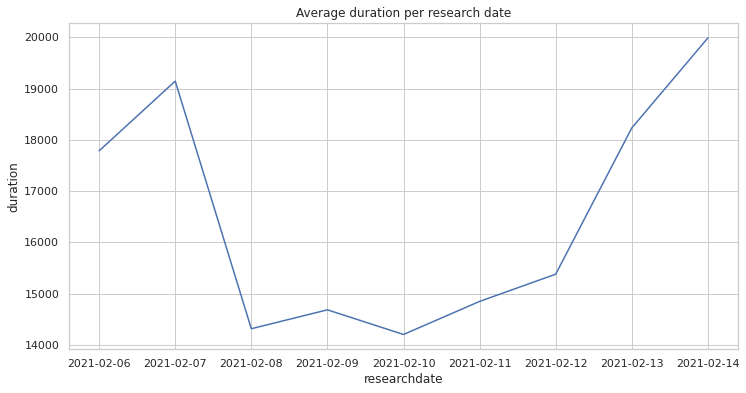

In [45]:
sns.lineplot(x=tmp.researchdate, y=tmp.duration)
plt.title('Average duration per research date');

In [46]:
# больше всего сессий в выходные дни

In [47]:
tmp = df.pivot_table(index='researchdate', columns='day_time', values='duration', aggfunc=np.mean).reset_index()
tmp

day_time,researchdate,daytime,evening,morning,night
0,2021-02-06,951.172919,961.998657,979.233014,835.591441
1,2021-02-07,875.960429,934.257840,1043.800869,985.917526
2,2021-02-08,959.842022,1017.962572,1109.094394,967.450111
3,2021-02-09,1012.424633,950.818060,1035.647172,896.769691
4,2021-02-10,1042.182240,1008.467742,1110.117188,972.727273
5,2021-02-11,970.163072,1006.172616,1036.193772,924.572792
6,2021-02-12,991.790481,960.441956,1060.723000,852.064811
7,2021-02-13,964.662787,970.805033,918.407811,895.916096
8,2021-02-14,909.295105,809.615639,919.926686,907.511886


In [48]:
df.pivot_table(index='researchdate', columns='day_time', values='packageid', aggfunc=lambda x:len(list(x)))

day_time,daytime,evening,morning,night
researchdate,,,,
2021-02-06,5465,7445,2399,2477
2021-02-07,6065,8610,2531,1940
2021-02-08,3798,6626,2087,1804
2021-02-09,3881,6711,2086,2006
2021-02-10,3446,6696,2048,2013
2021-02-11,3802,6639,2312,2095
2021-02-12,3971,6788,2213,2407
2021-02-13,5842,7391,2663,2336
2021-02-14,6313,9054,2728,1893


In [49]:
# распределение данных packageid researchdate и day_time равномерное, сильных выбросов не наблюдается
# средняя длительность ночью стабильно меньше, чем в другие части дня
# максимальный трафик приходится на вечер, меньше на дневное время и меньше всего на ночь/утро

In [50]:
df.pivot_table(index='title', columns='day_time', values='duration', aggfunc=np.mean, margins=True).reset_index()

day_time,title,daytime,evening,morning,night,All
0,Женщины 18-24,666.939351,586.177474,658.909091,518.782609,607.772891
1,Женщины 25-34,782.108865,772.189272,973.051643,760.768453,799.731824
2,Женщины 35-44,862.006993,859.794225,959.822813,890.371287,877.779007
3,Женщины 45-54,1026.247628,1034.639686,1085.244408,947.456140,1028.715838
4,Женщины 55-64,1095.574514,1199.537671,1102.524917,1100.480065,1142.301082
5,Женщины 65+,1309.250375,1209.624034,1185.855162,935.607477,1205.205876
6,Мужчины 18-24,762.786207,740.878049,743.428571,640.544959,733.242321
7,Мужчины 25-34,804.538758,849.969905,916.762178,973.246753,861.379923
8,Мужчины 35-44,884.626279,981.708597,1011.937916,999.810901,961.586140
9,Мужчины 45-54,799.626905,864.874372,1001.364452,947.593220,876.016874


In [51]:
df.pivot_table(index='title', columns='day_time', values='packageid', aggfunc=pd.Series.nunique, margins=True).reset_index()

day_time,title,daytime,evening,morning,night,All
0,Женщины 18-24,71,85,54,52,93
1,Женщины 25-34,93,96,91,83,101
2,Женщины 35-44,101,101,94,94,102
3,Женщины 45-54,99,98,95,94,100
4,Женщины 55-64,98,100,94,95,100
5,Женщины 65+,97,98,86,87,101
6,Мужчины 18-24,70,77,53,63,95
7,Мужчины 25-34,97,99,86,93,101
8,Мужчины 35-44,99,99,95,93,100
9,Мужчины 45-54,97,100,89,94,100


In [52]:
df.to_csv('megascope_task.csv')

### Итоги

* В данных нет пропущенных значений, но есть дубликаты
* Величина weight слабо коррелирует с остальными
* Данные распределены равномерно относительно характеристики пола и количества уникальных PackageID
* День отсчитывается с 5 часов утра


* С увеличением возраста количество женщин-респонедентов уменьшается, однако средняя длина сесси растёт - жинщины 45+ значительно больше смотрят телевизор, чем младшее поколение. У мужчин ситуация иная - старшее поколение (55+) смотрит телевизор активнее младшего, но не в такой степени, как в случае женщин
* Молодые мужчины (до 44) смотрят телевизор активнее женщин того же возраста, после 45 женщины смотрят телевизор активнее
* У мужчин после 44 прекращается рост телевизионной активности
* Крайние группы (18-24 и 65+) по своему поведению выбиваются из общей картины


* Распределения duration, weight смещено влево. Их распределения очень быстро падают.
* В начальных данных отсутствует корреляция между числовыми переменными
* Количество респондентов в группе коррелирует с количеством уникальных packageid и общей/средней длиной сессий
* Каждой паре ResearchDate, RespondentID соответствуте одно значение weight
* Величина weight в различных разрезах слабо коррелирует с другими


* В разрезе по времени суток видно, что ощутимо большая часть сессий проходит вечером, меньше всего - ночью.
* Количество уникальных респондентов не так сильно меняется от времени суток, тем не менее вечером их больше, а ночью - меньше
* Удельное число сессий изменяется симбатно
* Количество сессий в выходные довольно сильно увеличивается, а в будни - падает


### Что можно было бы добавить?

* Разбиение по тематикам сессий (какого типа программа, просматриваемая респондентом)
* Используется ли функция smart-TV
* Возможно, с какой модели телевизора респондент смотрит телепередачу
* География расположения респондентов (как следствие можно делать предположения о, например, финансовом состоянии респондента)